## Visualizing Relationship between variables


https://www.openintro.org/book/statdata/index.php?data=nc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nc_df= pd.read_csv('nc.csv')

In [3]:
nc_df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


In [36]:
nc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            829 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           998 non-null    float64
 4   premie          998 non-null    object 
 5   visits          991 non-null    float64
 6   marital         999 non-null    object 
 7   gained          973 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  gender          1000 non-null   object 
 11  habit           999 non-null    object 
 12  whitemom        998 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


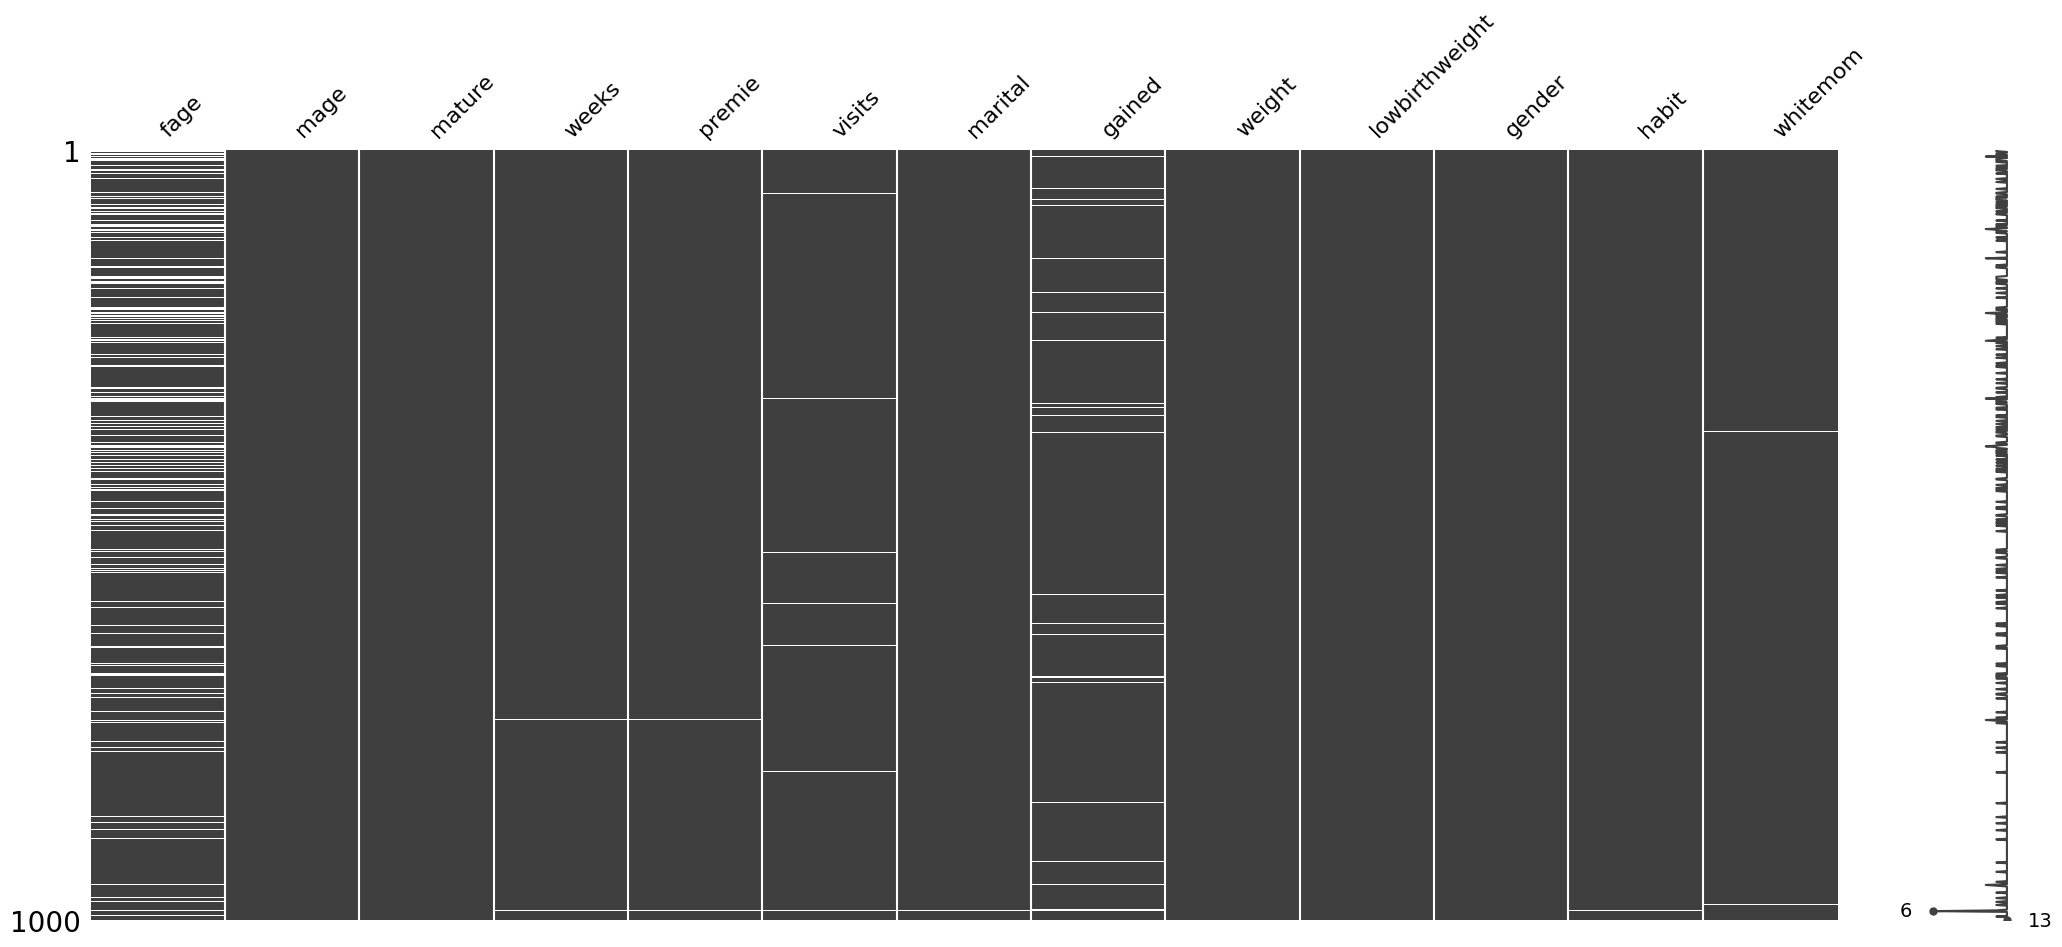

In [37]:
import missingno as msno 
msno.matrix(nc_df);

<Axes: >

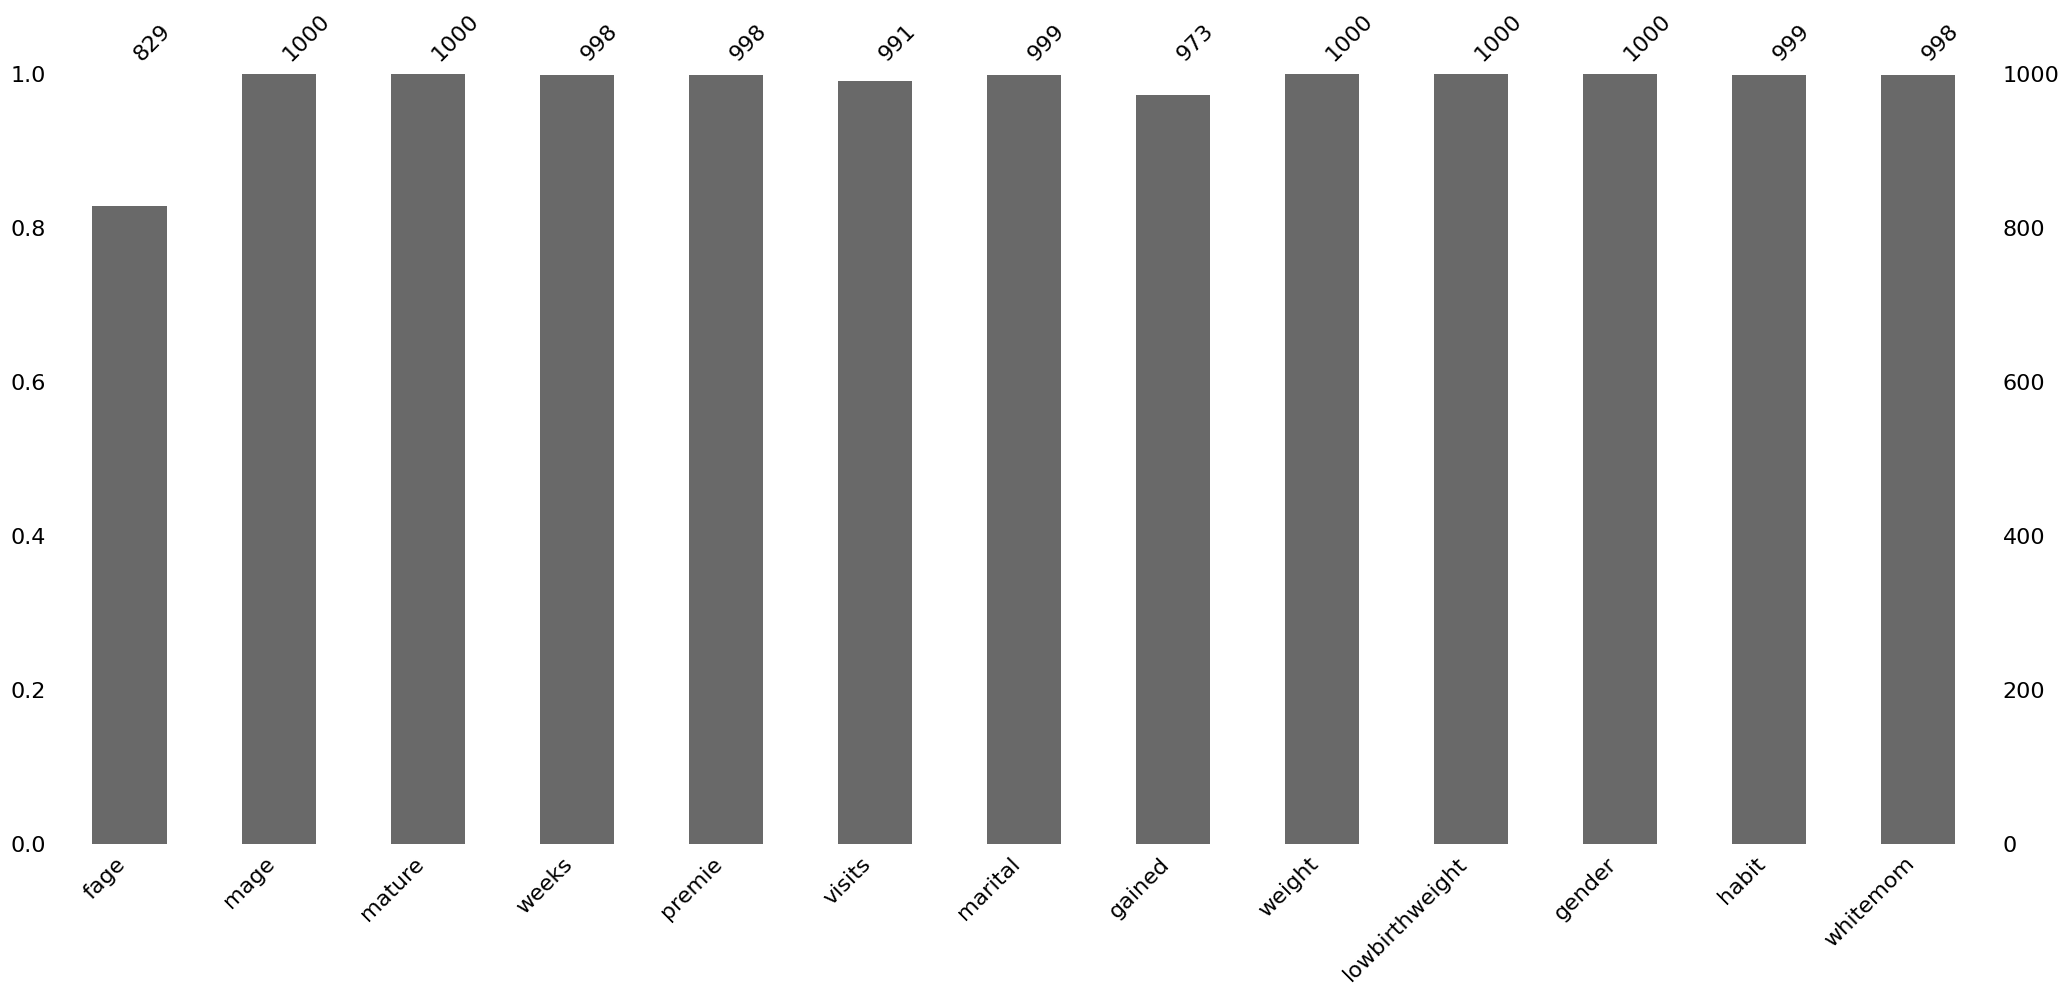

In [38]:
msno.bar(nc_df)

<Axes: >

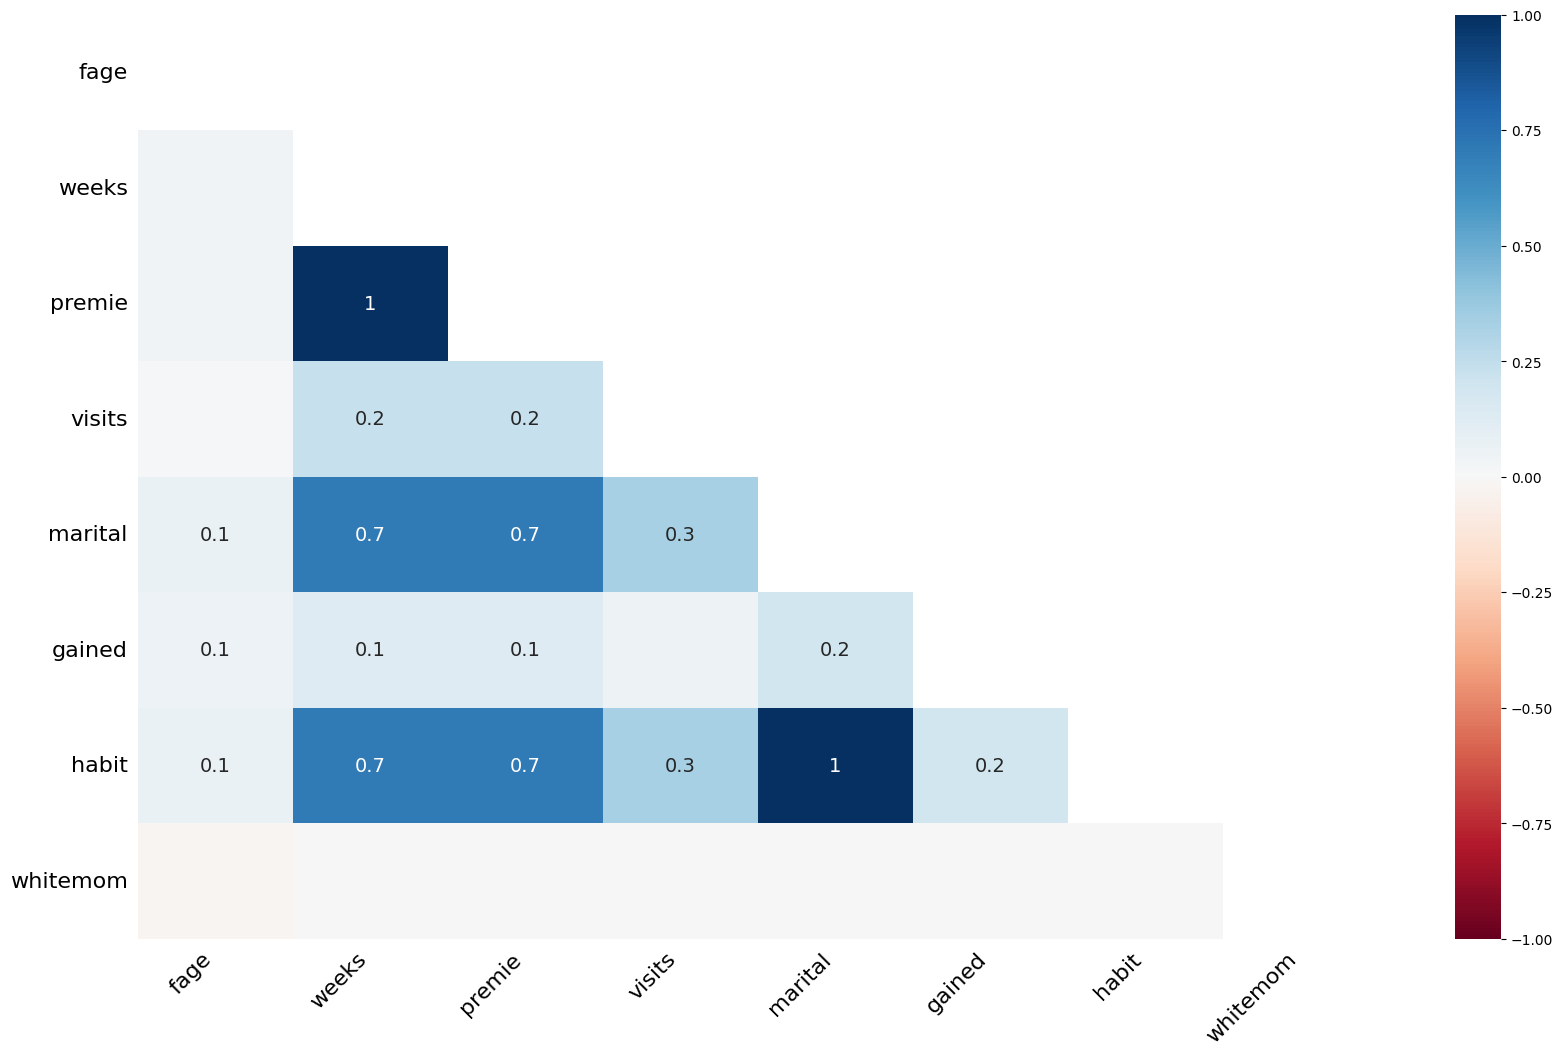

In [39]:
msno.heatmap(nc_df)

In [40]:
fage_mean = nc_df.fage.mean()

In [41]:
nc_df["fage"]= nc_df.fage.fillna(fage_mean)

In [42]:
nc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            1000 non-null   float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           998 non-null    float64
 4   premie          998 non-null    object 
 5   visits          991 non-null    float64
 6   marital         999 non-null    object 
 7   gained          973 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  gender          1000 non-null   object 
 11  habit           999 non-null    object 
 12  whitemom        998 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


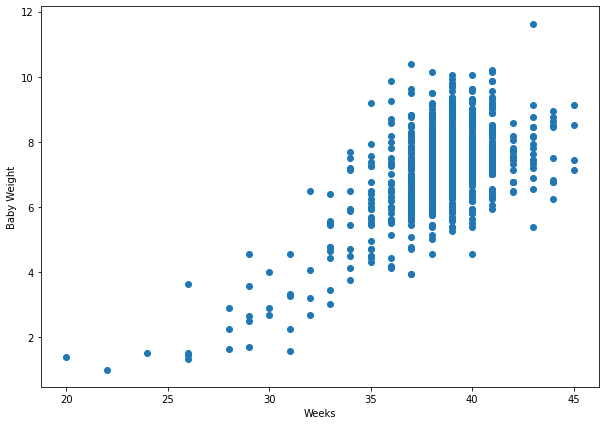

In [284]:
fig, ax = plt.subplots(figsize= (10, 7))
ax.scatter (nc_df['weeks'], nc_df['weight'])
ax.set(xlabel= 'Weeks', ylabel = 'Baby Weight');

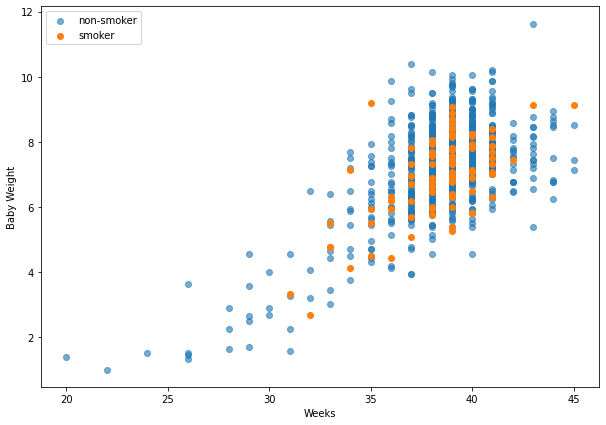

In [337]:
fig, ax = plt.subplots(figsize= (10, 7))
ax.scatter (nc_df[nc_df['habit']=='nonsmoker'].weeks, nc_df[nc_df['habit']=='nonsmoker'].weight, alpha= 0.6, label='non-smoker')
ax.scatter (nc_df[nc_df['habit']=='smoker'].weeks, nc_df[nc_df['habit']=='smoker'].weight, label= 'smoker')
ax.set(xlabel= 'Weeks', ylabel = 'Baby Weight')
ax.legend();

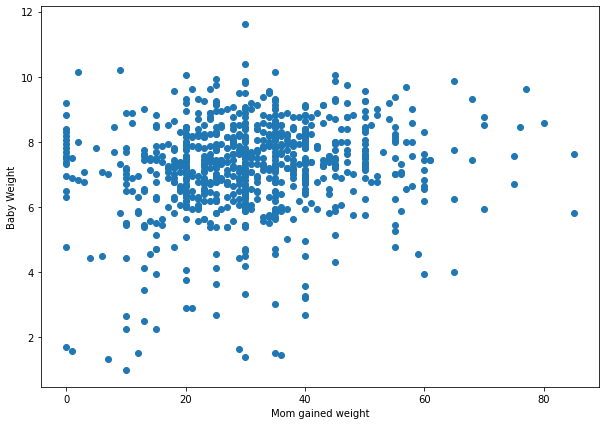

In [231]:
fig, ax = plt.subplots(figsize= (10, 7))
ax.scatter (nc_df['gained'], nc_df['weight'])
ax.set(xlabel= 'Mom gained weight', ylabel = 'Baby Weight');

In [232]:
nc_df['premie'].unique()

array(['full term', 'premie'], dtype=object)

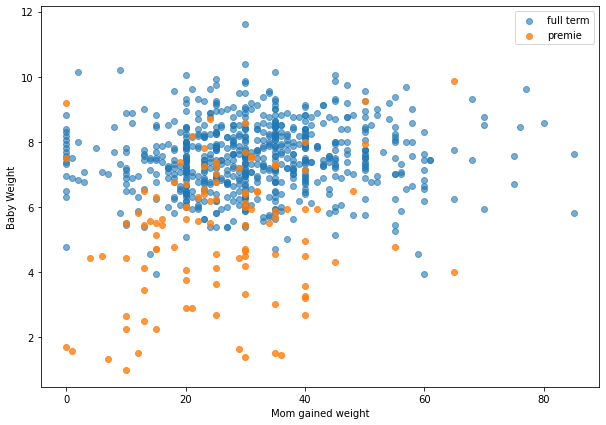

In [299]:
fig, ax = plt.subplots(figsize= (10, 7))
ax.scatter (nc_df[nc_df['premie']=='full term'].gained, nc_df[nc_df['premie']=='full term'].weight, alpha= 0.6, label='full term')
ax.scatter (nc_df[nc_df['premie']=='premie'].gained, nc_df[nc_df['premie']=='premie'].weight, alpha= 0.8, label='premie')
ax.set(xlabel= 'Mom gained weight', ylabel = 'Baby Weight')
ax.legend();

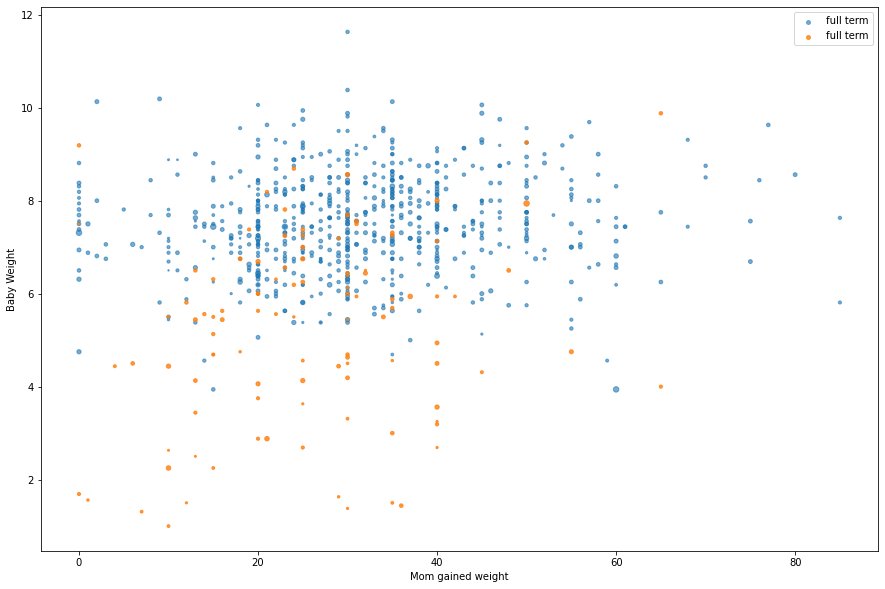

In [303]:
fig, ax = plt.subplots(figsize= (15, 10))
ax.scatter (nc_df[nc_df['premie']=='full term'].gained, nc_df[nc_df['premie']=='full term'].weight, alpha= 0.6, label='full term', s= nc_df[nc_df['premie']=='full term'].visits)
ax.scatter (nc_df[nc_df['premie']=='premie'].gained, nc_df[nc_df['premie']=='premie'].weight, alpha= 0.8, label='full term', s= nc_df[nc_df['premie']=='premie'].visits)
ax.set(xlabel= 'Mom gained weight', ylabel = 'Baby Weight')
ax.legend();

In [235]:
from sklearn import preprocessing

In [304]:
scaler= preprocessing.MinMaxScaler()
nc_df['visits_norm'] = scaler.fit_transform (pd.DataFrame(nc_df['visits']))*100

In [305]:
nc_df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom,visits_norm
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white,36.666667
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white,20.000000
6,18.0,15,younger mom,37.0,full term,12.0,married,76.0,8.44,not low,male,nonsmoker,not white,40.000000
7,17.0,15,younger mom,35.0,premie,5.0,married,15.0,4.69,low,male,nonsmoker,not white,16.666667
9,20.0,16,younger mom,37.0,full term,13.0,married,52.0,6.94,not low,female,nonsmoker,white,43.333333


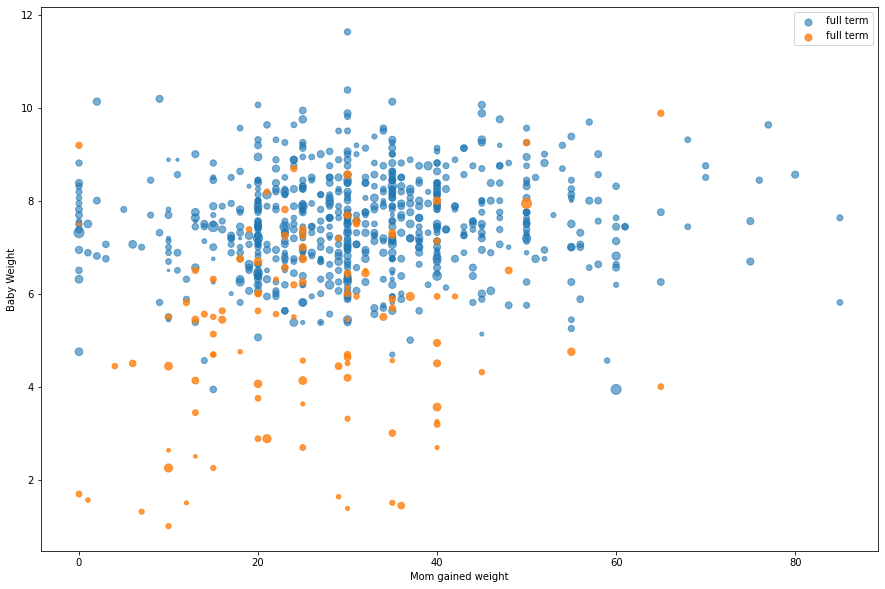

In [307]:
fig, ax = plt.subplots(figsize= (15, 10))
ax.scatter (nc_df[nc_df['premie']=='full term'].gained, nc_df[nc_df['premie']=='full term'].weight, alpha= 0.6, label='full term', s= nc_df[nc_df['premie']=='full term'].visits_norm)
ax.scatter (nc_df[nc_df['premie']=='premie'].gained, nc_df[nc_df['premie']=='premie'].weight, alpha= 0.8, label='full term', s= nc_df[nc_df['premie']=='premie'].visits_norm)
ax.set(xlabel= 'Mom gained weight', ylabel = 'Baby Weight')
ax.legend();

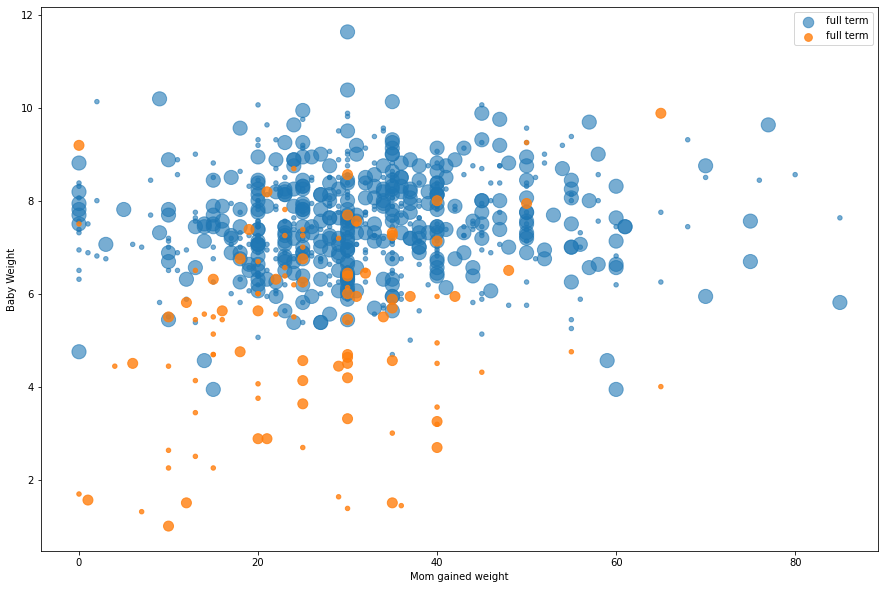

In [338]:
fig, ax = plt.subplots(figsize= (15, 10))
ax.scatter (nc_df[nc_df['premie']=='full term'].gained, nc_df[nc_df['premie']=='full term'].weight, alpha= 0.6, label='full term', s= nc_df[nc_df['premie']=='full term'].visits, sizes= (20,200))
ax.scatter (nc_df[nc_df['premie']=='premie'].gained, nc_df[nc_df['premie']=='premie'].weight, alpha= 0.8, label='full term', s= nc_df[nc_df['premie']=='premie'].visits , sizes= (20,100))
ax.set(xlabel= 'Mom gained weight', ylabel = 'Baby Weight')
ax.legend();

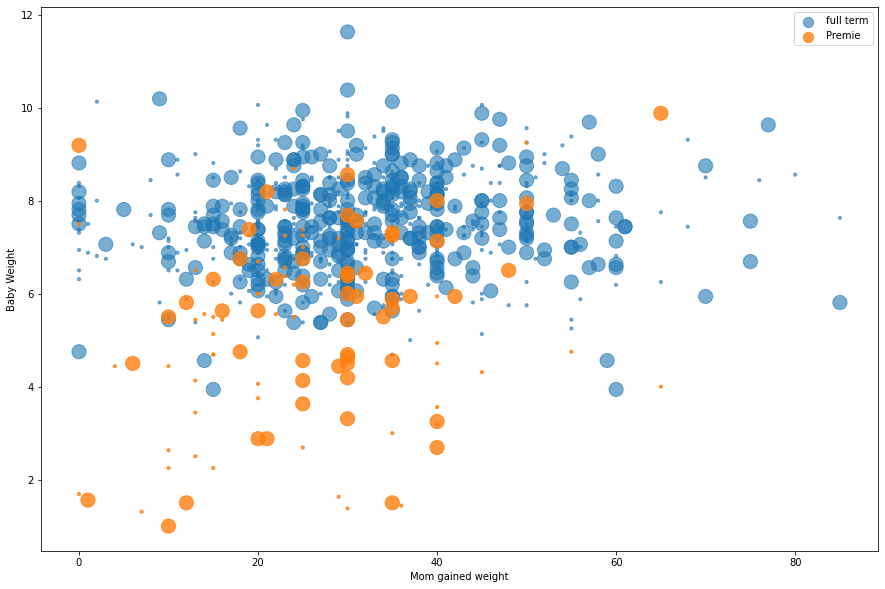

In [341]:
fig, ax = plt.subplots(figsize= (15, 10))
ax.scatter (nc_df[nc_df['premie']=='full term'].gained, nc_df[nc_df['premie']=='full term'].weight, alpha= 0.6, label='full term', s= nc_df[nc_df['premie']=='full term'].mage, sizes= (10,200))
ax.scatter (nc_df[nc_df['premie']=='premie'].gained, nc_df[nc_df['premie']=='premie'].weight, alpha= 0.8, label='Premie', s= nc_df[nc_df['premie']=='premie'].mage,sizes= (10,200))
ax.set(xlabel= 'Mom gained weight', ylabel = 'Baby Weight')
ax.legend();

In [313]:
scaler= preprocessing.MinMaxScaler()
nc_df['mage_normalized'] = scaler.fit_transform (pd.DataFrame(nc_df['mage']))*100

In [314]:
nc_df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom,visits_norm,mage_normalized
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white,36.666667,0.000000
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white,20.000000,0.000000
6,18.0,15,younger mom,37.0,full term,12.0,married,76.0,8.44,not low,male,nonsmoker,not white,40.000000,0.000000
7,17.0,15,younger mom,35.0,premie,5.0,married,15.0,4.69,low,male,nonsmoker,not white,16.666667,0.000000
9,20.0,16,younger mom,37.0,full term,13.0,married,52.0,6.94,not low,female,nonsmoker,white,43.333333,2.857143


In [342]:
nc_df.mage.unique()

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 50])

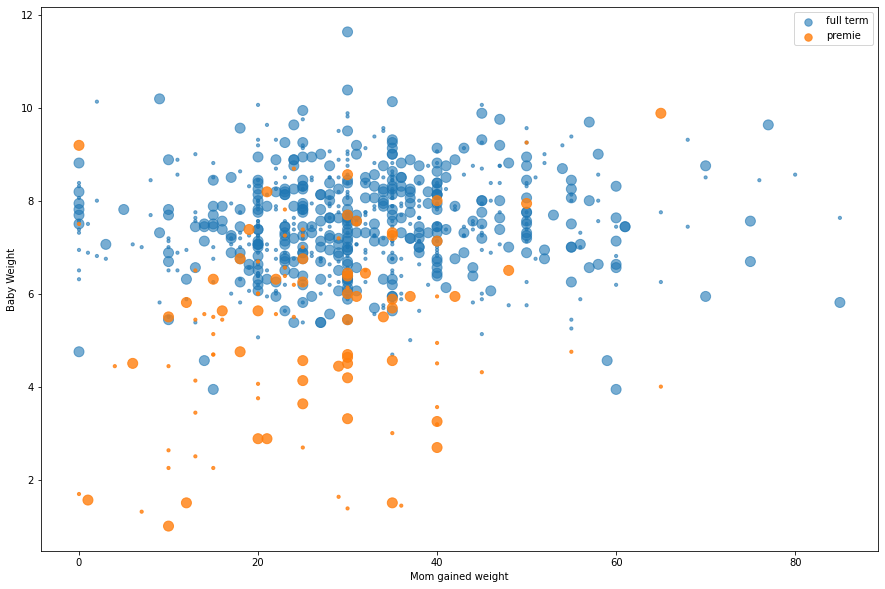

In [319]:
fig, ax = plt.subplots(figsize= (15, 10))
ax.scatter (nc_df[nc_df['premie']=='full term'].gained, nc_df[nc_df['premie']=='full term'].weight, alpha= 0.6, label='full term', s= nc_df[nc_df['premie']=='full term'].mage_normalized, sizes= (10,100))
ax.scatter (nc_df[nc_df['premie']=='premie'].gained, nc_df[nc_df['premie']=='premie'].weight, alpha= 0.8, label='premie', s= nc_df[nc_df['premie']=='premie'].mage_normalized , sizes= (10,100))
ax.set(xlabel= 'Mom gained weight', ylabel = 'Baby Weight')
ax.legend();

In [246]:
nc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 2 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fage             800 non-null    float64
 1   mage             800 non-null    int64  
 2   mature           800 non-null    object 
 3   weeks            800 non-null    float64
 4   premie           800 non-null    object 
 5   visits           800 non-null    float64
 6   marital          800 non-null    object 
 7   gained           800 non-null    float64
 8   weight           800 non-null    float64
 9   lowbirthweight   800 non-null    object 
 10  gender           800 non-null    object 
 11  habit            800 non-null    object 
 12  whitemom         800 non-null    object 
 13  visits_norm      800 non-null    float64
 14  mage_normalized  800 non-null    float64
dtypes: float64(7), int64(1), object(7)
memory usage: 100.0+ KB


In [343]:
from sklearn.preprocessing import LabelEncoder
size_le = LabelEncoder()
D = nc_df['premie'].values
D = size_le.fit_transform(D)

''

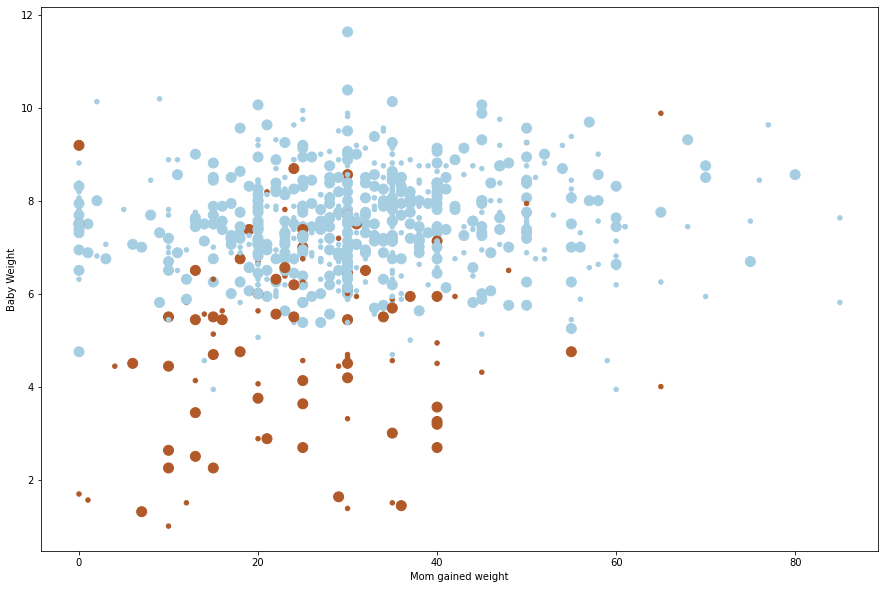

In [345]:
fig, ax = plt.subplots(figsize= (15, 10))
ax.scatter (nc_df.gained, nc_df.weight, c=D, s= nc_df.mage, cmap= 'Paired', sizes=(20, 100))
ax.set(xlabel= 'Mom gained weight', ylabel = 'Baby Weight')
;

''

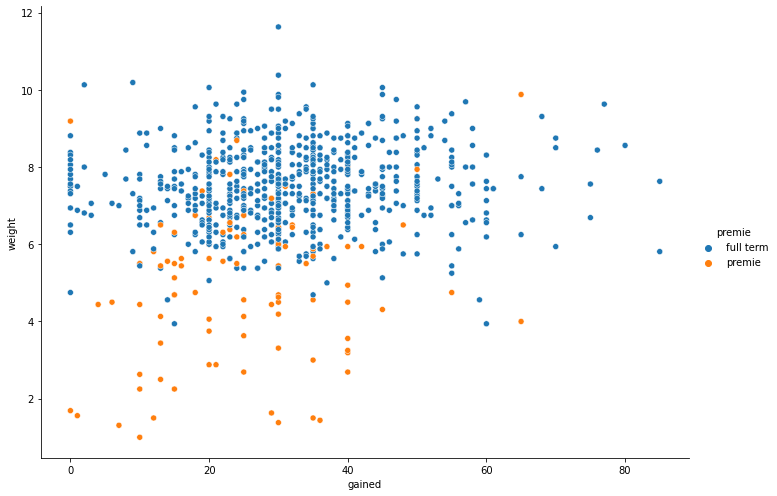

In [321]:
import seaborn as sns
sns.relplot(data=nc_df, x="gained", y="weight", hue="premie", height=7, aspect=1.4)
;

''

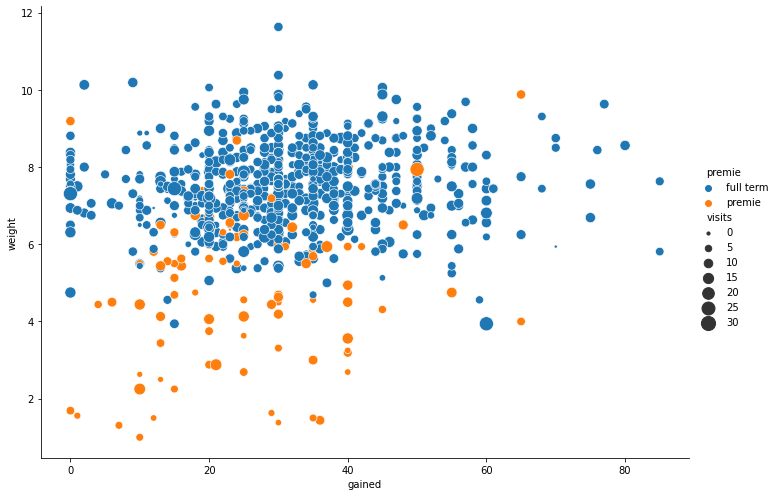

In [322]:
sns.relplot(data=nc_df, x="gained", y="weight", hue="premie", height=7, aspect=1.4, size="visits", sizes=(10, 200))
;

''

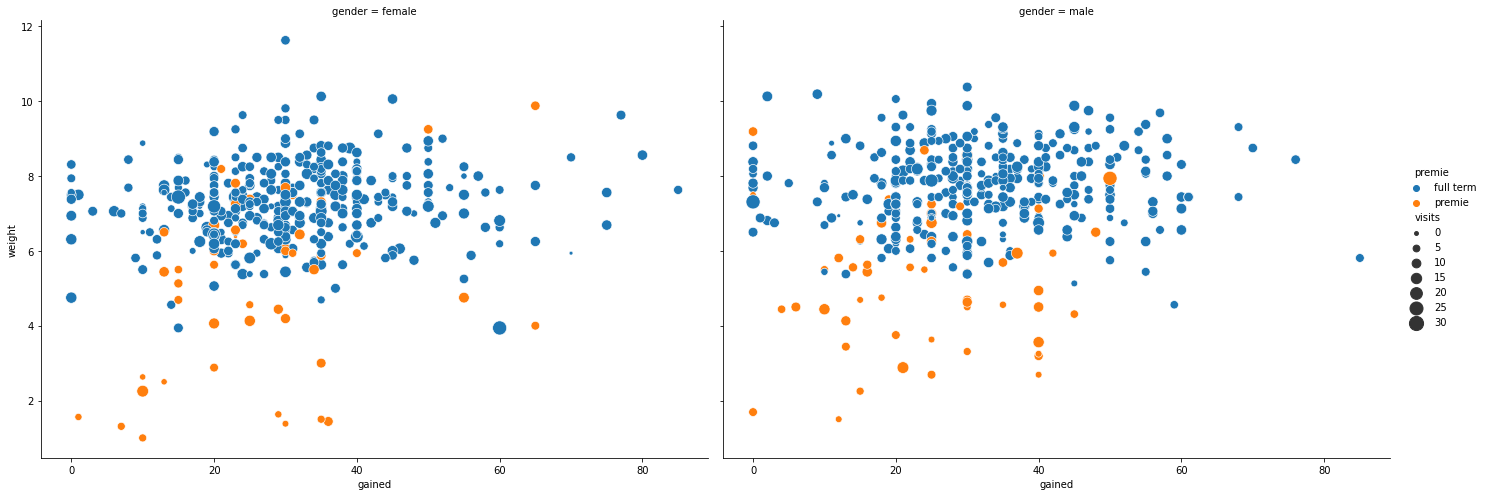

In [323]:

sns.relplot(data=nc_df, x="gained", y="weight", hue="premie", height=7, aspect=1.4, size="visits", sizes=(15, 200), col= 'gender')
;

''

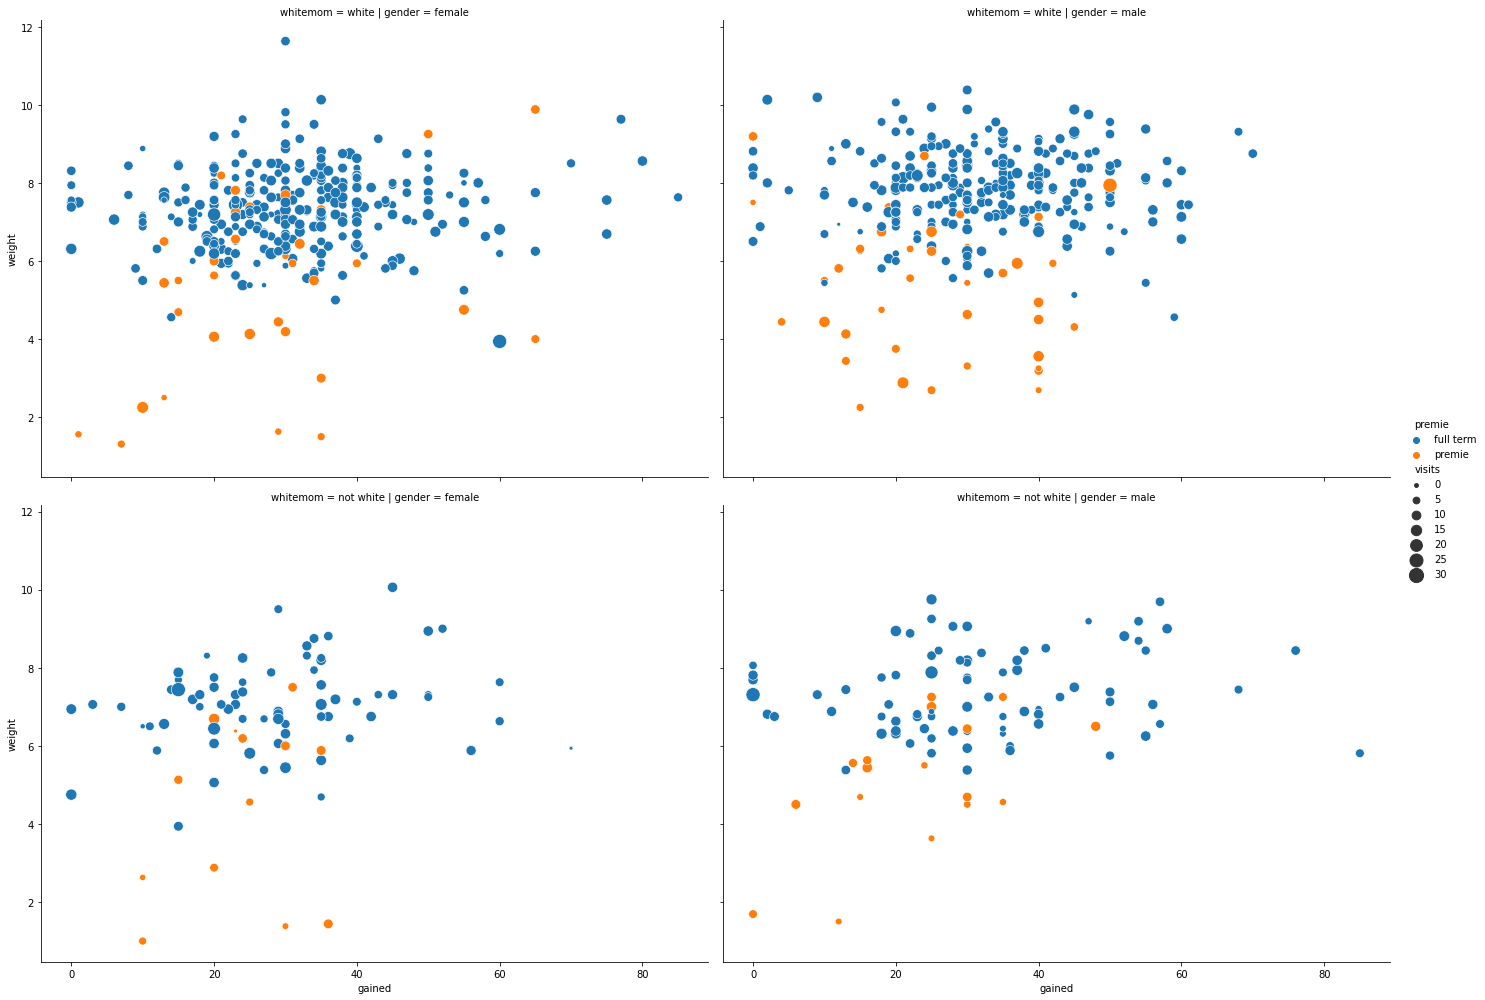

In [249]:

sns.relplot(data=nc_df, x="gained", y="weight", hue="premie", height=7, aspect=1.4, size="visits", sizes=(15, 200), col= 'gender', row = 'whitemom')
;

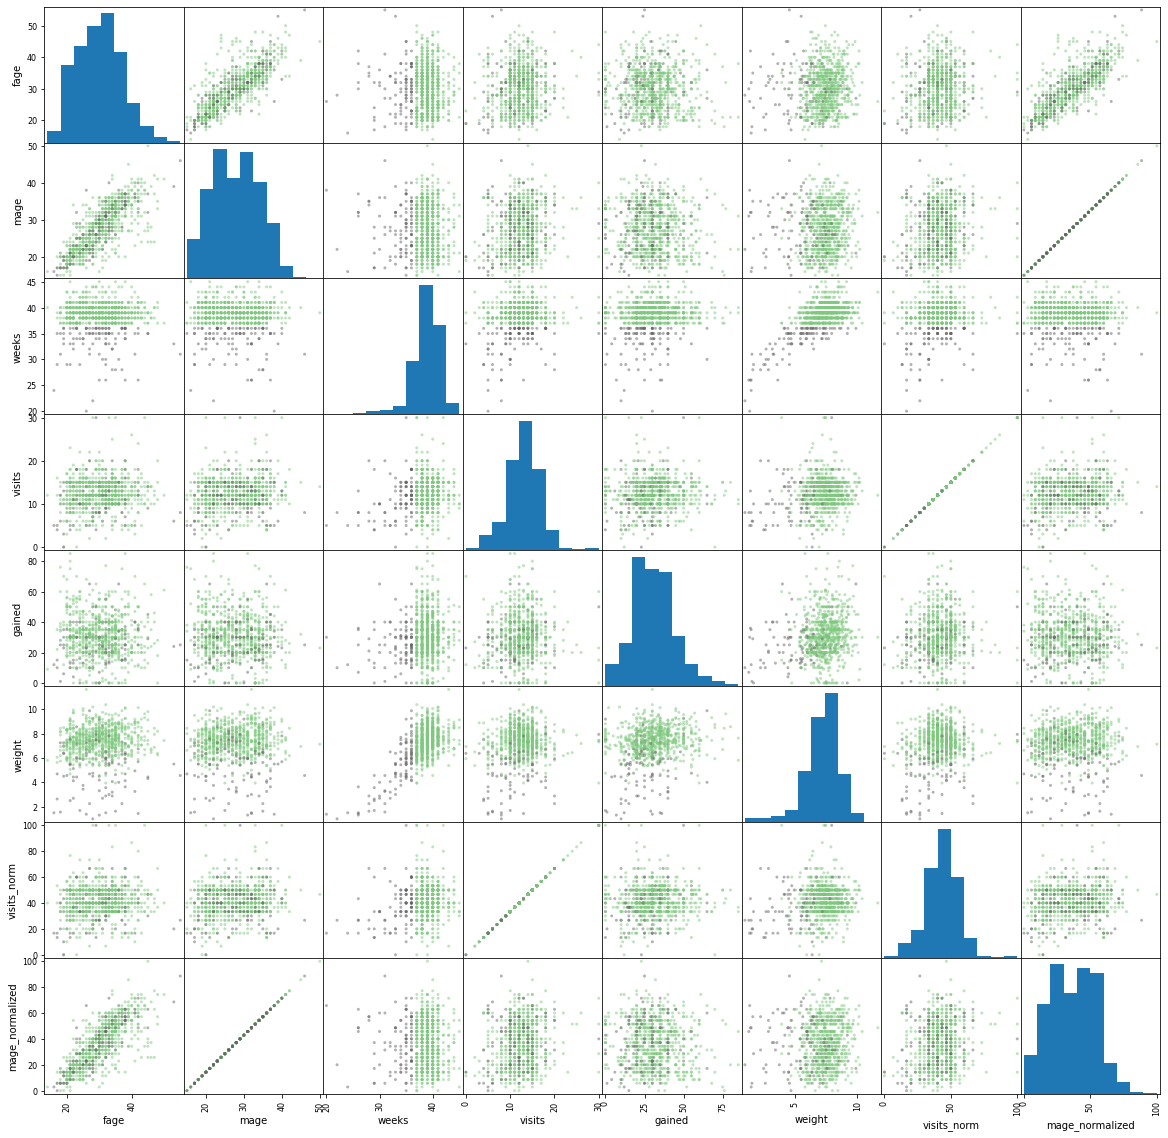

In [326]:
pairplot = pd.plotting.scatter_matrix (nc_df, figsize = (20,20), c= D, cmap= 'Accent')

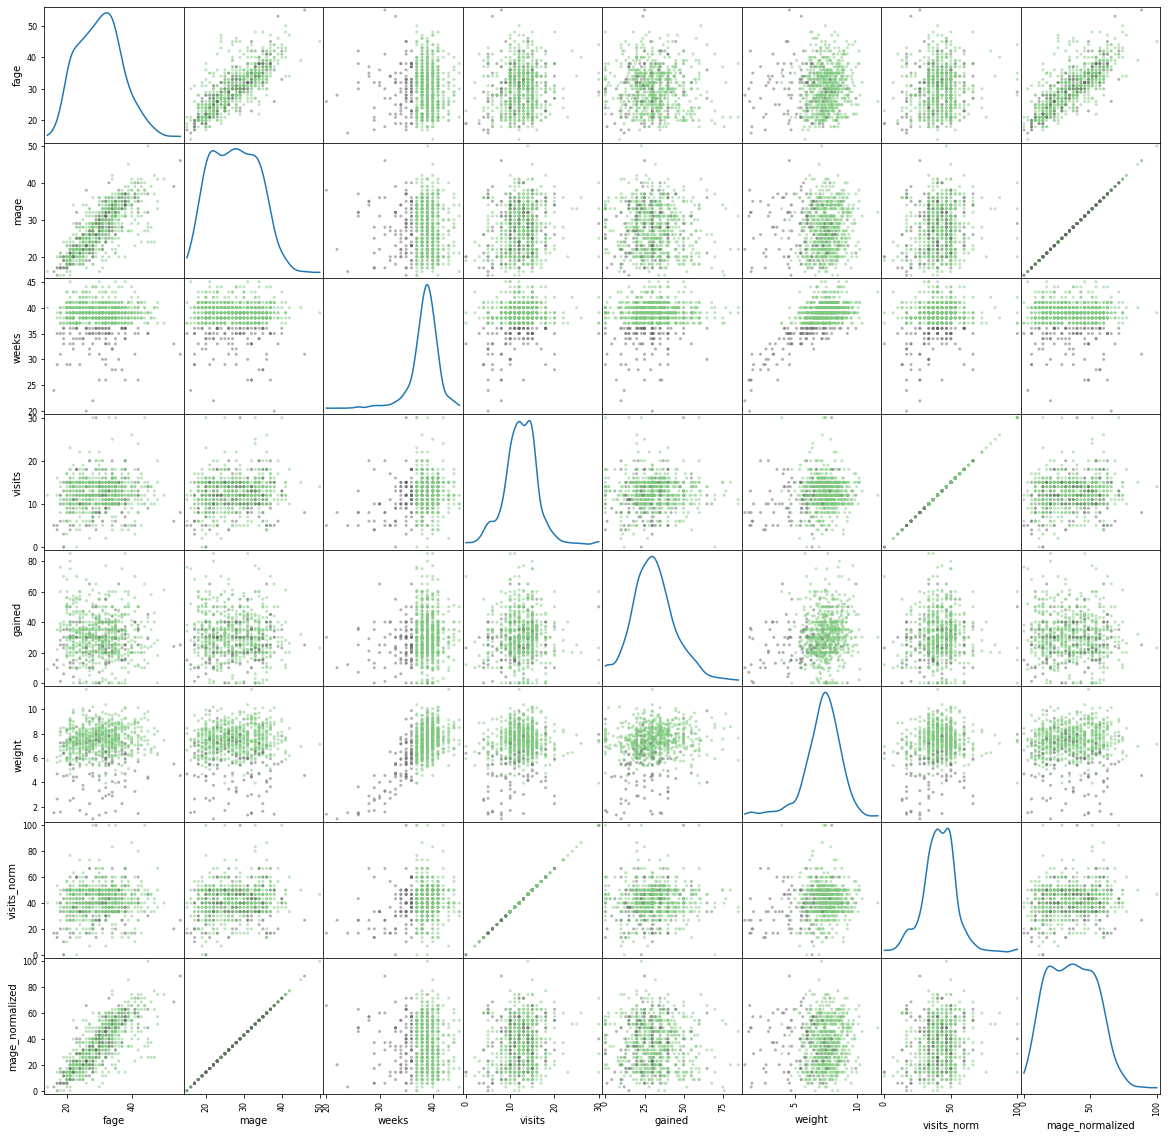

In [327]:
pairplot = pd.plotting.scatter_matrix (nc_df, figsize = (20,20), c= D, cmap= 'Accent', diagonal='kde')

In [146]:
nc_df.corr()

,fage,mage,weeks,visits,gained,weight,visits_norm,mage_normalized
fage,1.000000,0.780648,-0.007997,0.085239,-0.038946,0.073335,0.085239,0.780648
mage,0.780648,1.000000,-0.040008,0.142897,-0.059486,0.051698,0.142897,1.000000
weeks,-0.007997,-0.040008,1.000000,0.166717,0.098580,0.635889,0.166717,-0.040008
visits,0.085239,0.142897,0.166717,1.000000,0.055893,0.131280,1.000000,0.142897
gained,-0.038946,-0.059486,0.098580,0.055893,1.000000,0.166053,0.055893,-0.059486
weight,0.073335,0.051698,0.635889,0.131280,0.166053,1.000000,0.131280,0.051698
visits_norm,0.085239,0.142897,0.166717,1.000000,0.055893,0.131280,1.000000,0.142897
mage_normalized,0.780648,1.000000,-0.040008,0.142897,-0.059486,0.051698,0.142897,1.000000


In [147]:
nc_df.corr().style.background_gradient(cmap='PRGn', axis=None)

,fage,mage,weeks,visits,gained,weight,visits_norm,mage_normalized
fage,1.000000,0.780648,-0.007997,0.085239,-0.038946,0.073335,0.085239,0.780648
mage,0.780648,1.000000,-0.040008,0.142897,-0.059486,0.051698,0.142897,1.000000
weeks,-0.007997,-0.040008,1.000000,0.166717,0.098580,0.635889,0.166717,-0.040008
visits,0.085239,0.142897,0.166717,1.000000,0.055893,0.131280,1.000000,0.142897
gained,-0.038946,-0.059486,0.098580,0.055893,1.000000,0.166053,0.055893,-0.059486
weight,0.073335,0.051698,0.635889,0.131280,0.166053,1.000000,0.131280,0.051698
visits_norm,0.085239,0.142897,0.166717,1.000000,0.055893,0.131280,1.000000,0.142897
mage_normalized,0.780648,1.000000,-0.040008,0.142897,-0.059486,0.051698,0.142897,1.000000


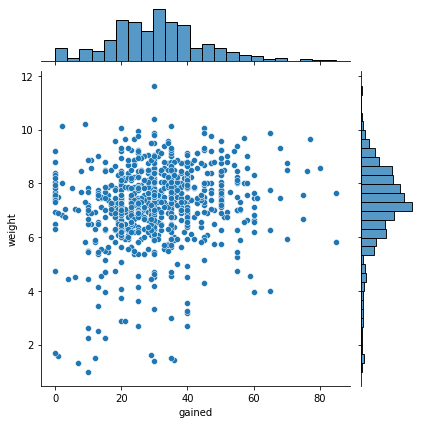

In [265]:
sns.jointplot(x='gained', y='weight', data=nc_df);


''

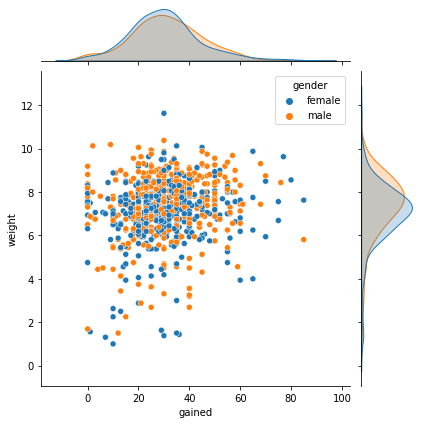

In [260]:
sns.jointplot(x='gained', y='weight', data=nc_df, hue='gender')
;

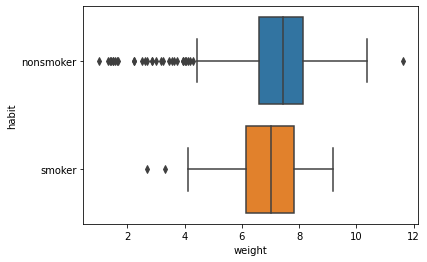

In [328]:
sns.boxplot(data=nc_df, x="weight", y="habit");